## <span style="color:black">Reverse Correlation and Receptive Field Mapping</span>

Reverse correlation is a technique for studying how sensory neurons respond to various stimuli, in order to understand the relationship between stimulus and neural response. Many neurons are driven by sensory stimulation from the outside world and is in a baseline state in the absence of that stimulation. When presented with an appropriate stimulus, the neuron is either activated above its baseline state of activity or in some cases suppressed below it's baseline. The degree of activation is captured in the neuron's firing rate.

The H1.mat file in this lab contains data collected from de Ruyter van Stevenick from a fly's H1 visual neuron responding to a white noise visual motion. Data were sampled at 500 Hz (in other words, $\Delta t = 2ms$). 

Within the file, $rho$ is a boolean vector indicating spike times (1 = spike, 0 = no spike), and $stim$ indicates the intensity of the stimulus (in this case, the horizontal speed of moving dots).

<img src="image2.gif" alt="drawing" width="400"/>

The fly has two H1 neurons, one in each hemisphere, and they are located in the Lobula plate in the diagram above. These neurons are very large making them easy to record from. Why are they called H1 neurons? Because they detect movement in the horizontal direction! We're going to prove this in the first problem!

Compute the spike-triggered average over the range from 0 to 300 ms (inclusive). Create a plot with appropriate labels on the x and y axis.

In [2]:
# Run this block of code to load the dataset: no alterations are necessary
import scipy.io as sio
H1 = sio.loadmat('H1.mat')
rho = H1['rho']
stim = H1['stim']

# Making them one dimensional to do further calculations
rho = rho[:,0]
stim = stim[:,0]

Text(0.5, 0, 'Time (ms) before spike')

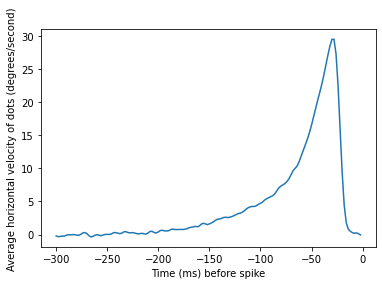

In [3]:
# import helpful packages
import matplotlib.pyplot as plt
import numpy as np

# find spikes using np.nonzero()
spikes, = np.where(rho==1)

# Omit any spikes occuring within the first 150 time points
spikes = spikes[spikes>150]

# pre-allocate memory: (hint: # spikes x 300 ms matrix)
Stim = np.zeros((len(spikes), 150))

# loop through matrix and store 300 ms of stimulus before each spike
for i in range(len(spikes)):
    Stim[i,:] = stim[spikes[i]-150:spikes[i]]

# average across each row of stim to create STA
STA = np.mean(Stim, axis=0)

# plot the results
time = np.arange(-300, 0, 2)
plt.figure()
plt.plot(time, STA)
plt.ylabel('Average horizontal velocity of dots (degrees/second)')
plt.xlabel('Time (ms) before spike')

In 3-5 sentences, describe what the shape and time course fo the STA is telling you.

In [ ]:
# Answer:

### Gaussian White Noise and Cat Retinal Ganglion Cell:

Now that you have learned how to apply reverse correlation to determine the average stimulus before a spike in a fly's H1 neuron, we are going to move on to a new data set.

The ganglion.mat file contains responses from the cat retinal ganglion cell (RGC) to two-dimensional images of Gaussian white noise. To read more about the dataset, see Kara, Reinagel & Reid (2000) *Neuron*. There are two enclosed objects: *counts* is a vector showing the number of spikes in each 15.6 ms time bin, and *stim* contains the 16x16 pixel random images that were shown at the corresponding times. In other words, stim(x,y,t) represents the pixel presented at coordinate (x,y) at time t.

To get an idea of what these images look like, write a for-loop which visualizes the first 10 images in a subplot with 2 rows and 5 columns.

In [ ]:
# Run this block of code to load the dataset: no alterations are necessary
import scipy.io as sio
ganglion = sio.loadmat('ganglion.mat')
counts = ganglion['counts']
stim = ganglion['stim']

In [ ]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Setting up plotting structure
plt.figure()
plt.subplots(nrows=2,ncols=10,figsize=(10,3))
# For-loop to plot images
for i in range():
    plt.subplot(2,5,i+1)
    plt.imshow()

Now, visualize the average across of all of the images in the cell below to demonstrate why we will need to why the images by how many spikes they elicit.

Challenge: Do it in one line.


In [ ]:
# your code here

In the cell below, write a brief explanation for why the above photo is blank.

In [ ]:
# Answer:

Next, calculate the spike-triggered average of the images in the set occuring at each spike. Note that there can be more than one spike in each time bin, so the STA must be computed by weighing each image by the number of spikes elicited in the corresponding time bin. Visualize the results using the **plt.imshow()** function.

In [ ]:
# Import packages
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# create arrays
ganglion = sio.loadmat('ganglion.mat')
counts = ganglion['counts']
stim = ganglion['stim']

# find spikes using np.nonzero()

# initialize data structures
imStore = np.zeros()
imFinal = np.zeros()

# loop through time bins and find image index of spike
# Grab image at each spike time and multiply it by the number of spikes in the corresponding time bin
for i in range():
    # Find number of spikes

    # Find corresponding image
    
    # Store the weighted image in imStore

# Calculate the average image
imFinal = 

# Plot the image
plt.figure()
plt.imshow()

The above image represents average image of what was shown the cat at the time of the spike. However, neurons do not fire instantaneously. Create an STA image for the average image shown immediately *before* each spike. Visualize this as before.


In [ ]:
# your code here

In 3-5 sentences, describe what you are seeing in the cell's response over time. Recall the types of receptive fields in RGC. What type of neuron does this seem to be?

In [ ]:
# answer:

### Optional Challenge for Hackers!

In Gosselin & Schyns (2003) *Psychological Science* participants were shown Gaussian white noise images and told that occasionally, a low-contrast letter S was embeddd within it. After viewing 15,000 images and occasionally "seeing" a letter S, the average image for one observer is shown on the left. It was blurred and thresholded to be seen more clearly on the right.

<img src="image1.png" alt="drawing" width="200"/>

Simulate this experiment using an image of a human face in face.jpg. Create 15,000 Guassian white noise images. Correlate each image with the face image. If the correlation is above a threshold given below, save the face template. In cognitive psychology, this analog to reverse correlation is known as a "classification image"

<img src="face.jpg" alt="drawing" width="200"/>

In [ ]:
# Load in the image
faceMat = plt.imread('face.jpg')

# Define face vector (turns from 64x64 to 4096,)
faceVec = np.ravel(faceMat)

# Initialize counter
count = -1

# Initialize data structure
chosenImage = np.zeros()

# For-loop to generate Gaussian white noise images and correlate them with faceMat
for i in range(15000):
    # Create random image using np.random.normal()
    randImage = 
    
    # Use this line to turn from 64x64 to 4096,
    imageVector = np.ravel(randImage)
    
    # Calculate correlation using np.corrcoef
    c = 
    thisCorr = c[0,1]
    
    # Conditional to save higher correlated images to chosenImages
    if thisCorr > 0.025:
        # Increment counter
        
        # Save in chosenImages
        
# Remove the zeros still in chosenImages
        

# Calculate average of saved images
avg_im = 
plt.figure()
plt.imshow(avg_im, cmap='gray')

Great work! Please upload this file to Lyceum for grading.